In [1]:
import os
import mmcv
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

from mmdet.datasets import CocoDataset
from mmdet.apis import init_detector, inference_detector
from mmdet.core.evaluation import eval_map, eval_recalls

from visualization import DetectionVisualizer
from utils import convert_predictions

%matplotlib inline

In [13]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from datasets import ImageFolder
from inference import Inference

### Specify path to the data and mmdet
---

In [3]:
DATA_DIR = '/trinity/home/d.kuznedelev/Datasets/COCO'
MMDET_DIR = "/trinity/home/d.kuznedelev/.conda/envs/mmlab/lib/python3.7/site-packages/mmdet"

In [4]:
train_dataset = ImageFolder(f"{DATA_DIR}/train2017")
val_dataset = ImageFolder(f"{DATA_DIR}/val2017")

agent = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)

### Load detectors
---

In [5]:
wk_detector_cfg = f"{MMDET_DIR}/configs/regnet/mask_rcnn_regnetx-400MF_fpn_mstrain-poly_3x_coco.py"
sg_detector_cfg = f"{MMDET_DIR}/configs/regnet/mask_rcnn_regnetx-4GF_fpn_mstrain-poly_3x_coco.py"

wk_detector = init_detector(wk_detector_cfg, checkpoint='checkpoints/mask_rcnn_regnetx-400MF_fpn.pth', device='cuda')
sg_detector = init_detector(sg_detector_cfg, checkpoint='checkpoints/mask_rcnn_regnetx-4GF_fpn.pth', device='cuda')

/trinity/home/d.kuznedelev/.conda/envs/mmlab/lib/python3.7/site-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader
Use load_from_local loader


### Prepare inferencing handle
---

In [8]:
inference = Inference(
    agent=agent,
    wk_detector=wk_detector,
    sg_detector=sg_detector,
    train_dataset=train_dataset,
    val_dataset=val_dataset
)
# load prediction visualizer
visualizer = DetectionVisualizer()

### Inference random image
---

In [11]:
def detect_on_random_image(dataset='train', conf_thr=0.7):
    raw_image, action, dt_results = inference.inference_random(dataset=dataset) # select train or val
    # convert predictions to bboxes
    bboxes, labels = convert_predictions(dt_results[0], conf_thr=conf_thr)
    visualizer.draw_patches_with_bboxes(raw_image, bboxes, labels, map_to_cond_id=False)

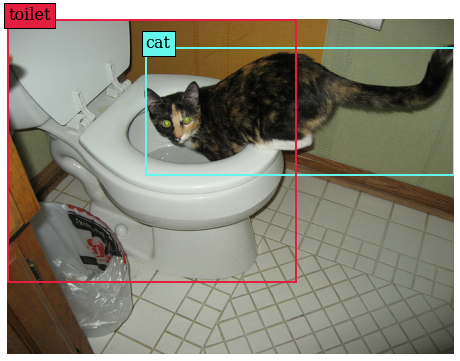

In [17]:
detect_on_random_image()